In [1]:
from  importlib.metadata import version
import torch


from previous_chapters import GPTModel

GPT_CONFIG_124M = {
    "vocab_size": 50257,   # Vocabulary size
    "context_length": 256, # Shortened context length (orig: 1024)
    "emb_dim": 768,        # Embedding dimension
    "n_heads": 12,         # Number of attention heads
    "n_layers": 12,        # Number of layers
    "drop_rate": 0.1,      # Dropout rate
    "qkv_bias": False      # Query-key-value bias
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval();

c:\Users\riswa\anaconda3\envs\Xray\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from torchsummary import summary
summary(model)

Layer (type:depth-idx)                   Param #
├─Embedding: 1-1                         38,597,376
├─Embedding: 1-2                         196,608
├─Dropout: 1-3                           --
├─Sequential: 1-4                        --
|    └─TransformerBlock: 2-1             --
|    |    └─MultiHeadAttention: 3-1      2,360,064
|    |    └─FeedForward: 3-2             4,722,432
|    |    └─LayerNorm: 3-3               1,536
|    |    └─LayerNorm: 3-4               1,536
|    |    └─Dropout: 3-5                 --
|    └─TransformerBlock: 2-2             --
|    |    └─MultiHeadAttention: 3-6      2,360,064
|    |    └─FeedForward: 3-7             4,722,432
|    |    └─LayerNorm: 3-8               1,536
|    |    └─LayerNorm: 3-9               1,536
|    |    └─Dropout: 3-10                --
|    └─TransformerBlock: 2-3             --
|    |    └─MultiHeadAttention: 3-11     2,360,064
|    |    └─FeedForward: 3-12            4,722,432
|    |    └─LayerNorm: 3-13              1,536
|

Layer (type:depth-idx)                   Param #
├─Embedding: 1-1                         38,597,376
├─Embedding: 1-2                         196,608
├─Dropout: 1-3                           --
├─Sequential: 1-4                        --
|    └─TransformerBlock: 2-1             --
|    |    └─MultiHeadAttention: 3-1      2,360,064
|    |    └─FeedForward: 3-2             4,722,432
|    |    └─LayerNorm: 3-3               1,536
|    |    └─LayerNorm: 3-4               1,536
|    |    └─Dropout: 3-5                 --
|    └─TransformerBlock: 2-2             --
|    |    └─MultiHeadAttention: 3-6      2,360,064
|    |    └─FeedForward: 3-7             4,722,432
|    |    └─LayerNorm: 3-8               1,536
|    |    └─LayerNorm: 3-9               1,536
|    |    └─Dropout: 3-10                --
|    └─TransformerBlock: 2-3             --
|    |    └─MultiHeadAttention: 3-11     2,360,064
|    |    └─FeedForward: 3-12            4,722,432
|    |    └─LayerNorm: 3-13              1,536
|

In [2]:
import os
import urllib.request

file_path = 'verdict.txt'
url = "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt"

if not os.path.exists(file_path):
    with urllib.request.urlopen(url) as response:
        text_data = response.read().decode('utf-8')
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(text_data)
else:
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.read()

In [3]:
text_data

'I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)\n\n"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it\'s going to send the value of my picture \'way up; but I don\'t think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing\'s lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn\'s "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like again"?\n\nWell!--even 

In [4]:
from previous_chapters import create_dataloader_v1,GPTDatasetV1
import tiktoken
from torch.utils.data import DataLoader

In [5]:
def create_dataloader_v1(txt,batch_size=4,max_length=256,
                         stride = 128,shuffle =True,drop_last= True,num_workers = 0):
    tokenizer =tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt,tokenizer=tokenizer,max_length=max_length,stride = stride)
    dataloader = DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last, num_workers=num_workers)

    return dataloader

In [6]:
train_ratio= 0.90
split_indx = int(train_ratio* len(text_data))

torch.manual_seed(123)
train_loader = create_dataloader_v1(
    text_data[:split_indx],
    batch_size=2,max_length=GPT_CONFIG_124M['context_length'],drop_last= True,
    stride = GPT_CONFIG_124M['context_length'],
shuffle= True,num_workers=0
)

val_loader = create_dataloader_v1(
    text_data[split_indx:],
    batch_size=2,
    max_length=GPT_CONFIG_124M['context_length'],stride = GPT_CONFIG_124M['context_length'],
    drop_last=False,shuffle= False,
    num_workers=0
)


In [36]:
for i ,(data,feature)in enumerate(train_loader):
    print("data",data)
    print("feature",feature)

data tensor([[   40,   367,  2885,  1464,  1807,  3619,   402,   271, 10899,  2138,
           257,  7026, 15632,   438,  2016,   257,   922,  5891,  1576,   438,
           568,   340,   373,   645,  1049,  5975,   284,   502,   284,  3285,
           326,    11,   287,   262,  6001,   286,   465, 13476,    11,   339,
           550,  5710,   465, 12036,    11,  6405,   257,  5527, 27075,    11,
           290,  4920,  2241,   287,   257,  4489,    64,   319,   262, 34686,
         41976,    13,   357, 10915,   314,  2138,  1807,   340,   561,   423,
           587, 10598,   393, 28537,  2014,   198,   198,     1,   464,  6001,
           286,   465, 13476,     1,   438,  5562,   373,   644,   262,  1466,
          1444,   340,    13,   314,   460,  3285,  9074,    13, 46606,   536,
          5469,   438, 14363,   938,  4842,  1650,   353,   438,  2934,   489,
          3255,   465, 48422,   540,   450,    67,  3299,    13,   366,  5189,
          1781,   340,   338,  1016,   284,  37

In [7]:
n_epochs = 15
initial_lr = 0.0001
peak_lr = 0.01

In [8]:
len(train_loader)

9

In [9]:
total_steps = len(train_loader) * n_epochs
warmup_steps = int(0.2 * total_steps) # 20% warmup
print(warmup_steps)

27


In [10]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# img = train_features[0].squeeze()
# label = train_labels[0]
# plt.imshow(img, cmap="gray")
# plt.show()
# print(f"Label: {label}")

Feature batch shape: torch.Size([2, 256])
Labels batch shape: torch.Size([2, 256])


In [43]:
for input_batch,target_batch in train_loader:
    # print (input_batch)
    print(target_batch)
    # print(o)

tensor([[   11,   465, 10904,  4252,  6236,   429, 25839,  9230,   808,   276,
           416,   257,  8212,   326, 13663,   262,  9040,   286,   257,  2116,
            12, 10414,   738,   285, 23968,  4891,    11,   314,  2936,   284,
           644,   257,  4922,   339,   550,   262,   976,  3081,   355,   465,
          5986,   438,  1169,  3081,   286,  2045,  1190,  4119,    81,   621,
           339,   373,    13,   198,   198,  6653,  3656, 27846,   379,   683,
          1207,  8344,   803,   306,    11,   475,   465,  2951, 21650,  1613,
           607,   284,   262, 18560,    13,   198,   198,     1,  5246,    13,
          8759,  2763,  2227,   284,   766,   340,   553,   673,  2540,    11,
           355,   611,  2859,  3500,  5223,    13,   679, 28271,   465, 12450,
            11,   991, 16755,    13,   198,   198,     1,  5812,    11,  8759,
          2763,  1043,   502,   503,   890,  2084,   553,   339,   531, 15376,
            26,   788,    11,  6427,   465,  3211,  

In [11]:
lr_increment = (peak_lr-initial_lr)/warmup_steps
global_step = -1
track_lrs = []
optimizer = torch.optim.AdamW(model.parameters(),weight_decay=0.1)
for epoch in range(n_epochs):
    for input_batch,target_batch in train_loader:
        optimizer.zero_grad()

        global_step+=1

        if global_step < warmup_steps:
            lr = initial_lr+global_step * lr_increment
        else:
            lr = peak_lr
    for param_group in optimizer.param_groups:

        param_group['lr'] = lr

    track_lrs.append(optimizer.param_groups[0]['lr'])




In [14]:
track_lrs

[0.003033333333333333,
 0.006333333333333334,
 0.009633333333333332,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01]

In [13]:
param_group

{'params': [Parameter containing:
  tensor([[ 3.3737e-01, -1.7778e-01, -3.0353e-01,  ..., -3.1812e-01,
           -1.3936e+00,  5.2262e-01],
          [ 2.5787e-01,  3.4197e-01, -8.1678e-01,  ..., -4.0981e-01,
            4.9785e-01, -3.7207e-01],
          [ 7.9574e-01,  5.3501e-01,  9.4275e-01,  ..., -1.0749e+00,
            9.5492e-02, -1.4138e+00],
          ...,
          [-7.1278e-01, -5.0190e-01,  1.4119e+00,  ..., -1.4979e-01,
           -4.8977e-01, -1.0620e+00],
          [ 2.0646e+00,  1.1190e+00,  3.8486e-01,  ..., -7.2015e-01,
           -5.5703e-01,  9.8639e-01],
          [ 1.1364e-03, -7.5320e-01, -1.7924e-01,  ..., -3.2443e-01,
            2.6055e-01,  5.8885e-01]], requires_grad=True),
  Parameter containing:
  tensor([[ 0.8769,  0.2550,  0.8441,  ..., -1.0354,  1.3085,  1.7957],
          [-1.0029,  0.0995,  1.2459,  ...,  1.5453, -0.1126, -1.5197],
          [ 1.3317,  0.7561,  0.9077,  ...,  0.0830,  1.8336, -2.2225],
          ...,
          [ 1.1003, -0.5333,  0.

ValueError: x and y must have same first dimension, but have shapes (1,) and (15,)

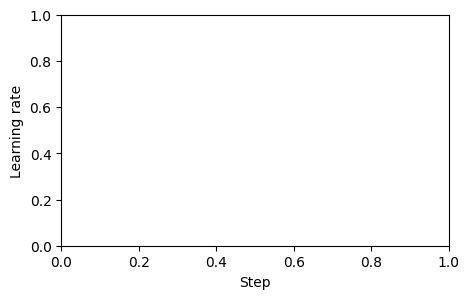

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.ylabel("Learning rate")
plt.xlabel("Step")
total_training_steps = len(train_loader) * n_epochs
plt.plot(total_training_steps, track_lrs)
plt.tight_layout(); plt.savefig("1.pdf")
plt.show()

In [15]:
import math

min_lr = 0.1 * initial_lr
track_lrs = []

lr_increment = (peak_lr - initial_lr) / warmup_steps
global_step = -1

for epoch in range(n_epochs):
    for input_batch, target_batch in train_loader:
        optimizer.zero_grad()
        global_step += 1
    
        # Adjust the learning rate based on the current phase (warmup or cosine annealing)
        if global_step < warmup_steps:
            # Linear warmup
            lr = initial_lr + global_step * lr_increment  
        else:
            # Cosine annealing after warmup
            progress = ((global_step - warmup_steps) / 
                        (total_training_steps - warmup_steps))
            lr = min_lr + (peak_lr - min_lr) * 0.5 * (
                1 + math.cos(math.pi * progress))
        
        # Apply the calculated learning rate to the optimizer
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr
        track_lrs.append(optimizer.param_groups[0]["lr"])
    
        # Calculate loss and update weights

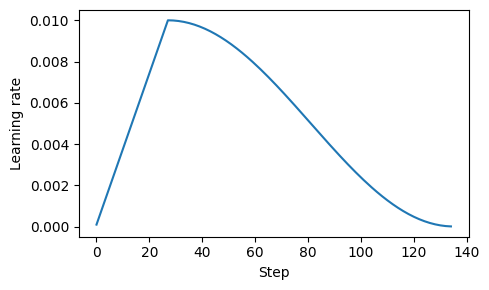

In [16]:
plt.figure(figsize=(5, 3))
plt.ylabel("Learning rate")
plt.xlabel("Step")
plt.plot(range(total_training_steps), track_lrs)
plt.tight_layout(); plt.savefig("2.pdf")
plt.show()

In [17]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[ 3.3737e-01, -1.7778e-01, -3.0353e-01,  ..., -3.1812e-01,
            -1.3936e+00,  5.2262e-01],
           [ 2.5787e-01,  3.4197e-01, -8.1678e-01,  ..., -4.0981e-01,
             4.9785e-01, -3.7207e-01],
           [ 7.9574e-01,  5.3501e-01,  9.4275e-01,  ..., -1.0749e+00,
             9.5492e-02, -1.4138e+00],
           ...,
           [-7.1278e-01, -5.0190e-01,  1.4119e+00,  ..., -1.4979e-01,
            -4.8977e-01, -1.0620e+00],
           [ 2.0646e+00,  1.1190e+00,  3.8486e-01,  ..., -7.2015e-01,
            -5.5703e-01,  9.8639e-01],
           [ 1.1364e-03, -7.5320e-01, -1.7924e-01,  ..., -3.2443e-01,
             2.6055e-01,  5.8885e-01]], requires_grad=True),
   Parameter containing:
   tensor([[ 0.8769,  0.2550,  0.8441,  ..., -1.0354,  1.3085,  1.7957],
           [-1.0029,  0.0995,  1.2459,  ...,  1.5453, -0.1126, -1.5197],
           [ 1.3317,  0.7561,  0.9077,  ...,  0.0830,  1.8336, -2.2225],
           ...,
           [ 

In [20]:
from  previous_chapters import *
def train_model (model,train_loader,val_loader,optimizer,device,
                 n_epochs,eval_freq,eval_iter,start_context, tokenizer,
                warmup_steps, initial_lr=3e-05, min_lr=1e-6):
    train_loss,val_loss,track_tokens_seen,track_lrs = [], [], [], []
    tokens_seen,global_step = 0,-1
    peak_lrs = optimizer.param_groups[0]['lr']
    total_training_steps = len(train_loader)* n_epochs
    lr_increment = (peak_lr-initial_lr)/warmup_steps

    for epoch in range(n_epochs):
        model.train()
        for input_batch,target_batch in train_loader:
            optimizer.zero_grad()
            global_step +=1
            if global_step<  warmup_steps:
                lr = initial_lr + global_step * lr_increment
            else:
                progress = ((global_step - warmup_steps) / 
                            (total_training_steps - warmup_steps))
                lr = min_lr + (peak_lr - min_lr) * 0.5 * (1 + math.cos(math.pi * progress))
        for param_group in optimizer.param_groups:
            param_group['lr' ]= lr
        track_lrs.append(lr)

        loss = calc_loss_batch(input_batch, target_batch, model, device)
        loss.backward()

        # Apply gradient clipping after the warmup phase to avoid exploding gradients
        if global_step > warmup_steps:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        tokens_seen += input_batch.numel()

        # Periodically evaluate the model on the training and validation sets
        if global_step % eval_freq == 0:
            train_loss, val_loss = evaluate_model(
                model, train_loader, val_loader,
                device, eval_iter
            )
            train_loss.append(train_loss)
            val_loss.append(val_loss)
            track_tokens_seen.append(tokens_seen)
            # Print the current losses
            print(f"Ep {epoch+1} (Iter {global_step:06d}): "
                    f"Train loss {train_loss:.3f}, "
                    f"Val loss {val_loss:.3f}"
            )

    # Generate and print a sample from the model to monitor progress
    generate_and_print_sample(
        model, tokenizer, device, start_context
    )

    return train_loss, val_loss, track_tokens_seen, track_lrs

In [23]:
import tiktoken

# Note:
# Uncomment the following code to calculate the execution time
# import time
# start_time = time.time()

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)

peak_lr = 5e-4
optimizer = torch.optim.AdamW(model.parameters(), weight_decay=0.1)
tokenizer = tiktoken.get_encoding("gpt2")

n_epochs = 3
train_losses, val_losses, tokens_seen, lrs = train_model(
    model, train_loader, val_loader, optimizer, device, n_epochs=n_epochs,
    eval_freq=5, eval_iter=1, start_context="Every effort moves you",
    tokenizer=tokenizer, warmup_steps=warmup_steps, 
    initial_lr=1e-5, min_lr=1e-5
)

# Note:
# Uncomment the following code to show the execution time
import time

# Record the start time
start_time = time.time()

# (Your training code would go here)

# Record the end time
end_time = time.time()

# Calculate execution time in minutes
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")


Every effort moves you the.                                                
Training completed in 0.00 minutes.


In [24]:
print(tokens_seen)

[]


In [25]:
print(lr)

1.2113134339408007e-05
